In [1]:
# Study: EDA_BBox - NIH Chest X-Rays
# Author: Willian Oliveira
# Start: 12/09/2022
# Motivation: Analyse features on 'BBox_List_2017.csv' and plot some images to check if we can use this as a verification tool for disease region detection models.
# Study Status: On going

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import os
from glob import glob

In [3]:
# Load 'BBox_List_2017.csv' for further analysis
bbox_list = pd.read_csv('BBox_List_2017.csv')
print(f'Dataset shape: {bbox_list.shape}')
bbox_list[:900:200].style

Dataset shape: (984, 9)


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,nan,nan,nan
200,00017178_007.png,Cardiomegaly,345.491525,300.203390,445.830508,378.576271,nan,nan,nan
400,00016291_019.png,Effusion,152.787302,75.851852,275.233862,363.005291,nan,nan,nan
600,00011925_072.png,Mass,377.173333,254.046823,161.564444,405.048889,nan,nan,nan
800,00025962_000.png,Pneumonia,533.048889,305.246823,248.035556,210.488889,nan,nan,nan


In [4]:
# Get an overview of our working database.
def unique_values_table(df, uv=3):
    """
    Print a markdown table
    with the col, the number of unique values and the unique values 
    list if there are more than 3 unique values (uv) by defalt.
    
    """
    from IPython.display import display, Markdown
    md_table_str = '|Column Name|Unique Values||\n|---|---|---|\n'
    for col_name, unique_values in df.nunique().items():
        if unique_values > uv:
            md_table_str += '|{}|{}|\n'.format(col_name, unique_values)
        else:
            md_unique_str = ' '.join([
                f'{name}: {value*100:.1f}\%'
                for name, value in 
                df[col_name].value_counts(normalize=True).items()
            ])

            md_table_str += '|{}|{}|{}\n'.format(
                col_name, unique_values, md_unique_str)
    display(Markdown(md_table_str))
    
unique_values_table(bbox_list, 8)

|Column Name|Unique Values||
|---|---|---|
|Image Index|880|
|Finding Label|8|Atelectasis: 18.3\% Effusion: 15.5\% Cardiomegaly: 14.8\% Infiltrate: 12.5\% Pneumonia: 12.2\% Pneumothorax: 10.0\% Mass: 8.6\% Nodule: 8.0\%
|Bbox [x|705|
|y|700|
|w|608|
|h]|647|
|Unnamed: 6|0|
|Unnamed: 7|0|
|Unnamed: 8|0|


In [5]:
fig = px.histogram(bbox_list, x="Finding Label", color="Finding Label",
                   hover_data=bbox_list.columns)
fig.layout.yaxis.title.text = 'Exams'
fig.update_layout(title_text='Findings on BBox List', title_x=0.5)
fig.show()

In [6]:
# Get all image paths for img plotting
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('images*', '*', '*.png'))}

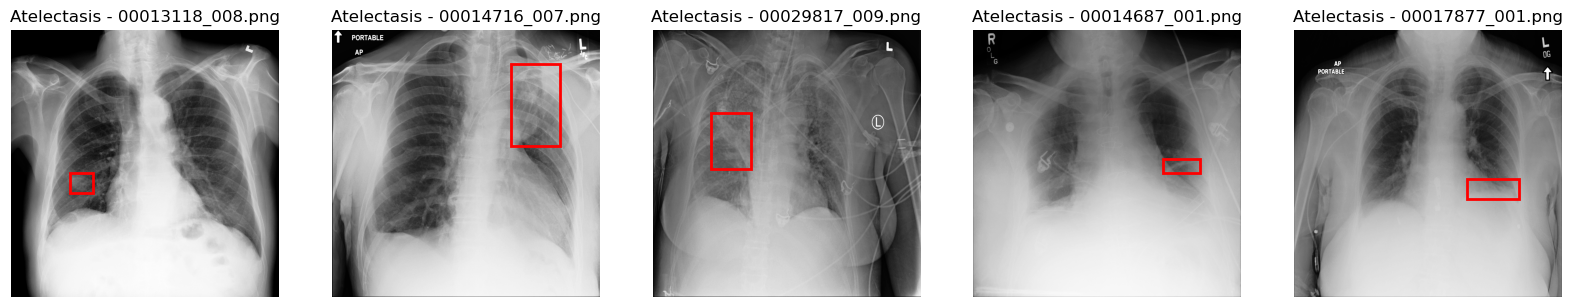

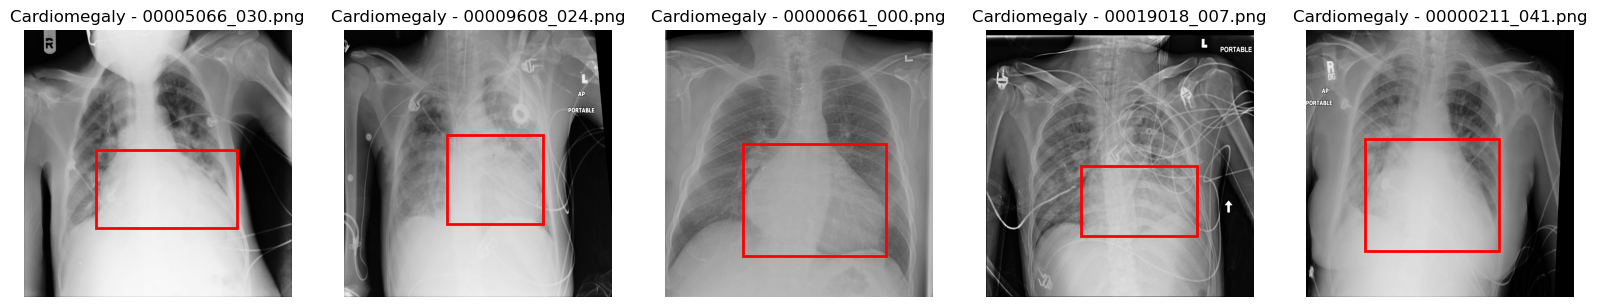

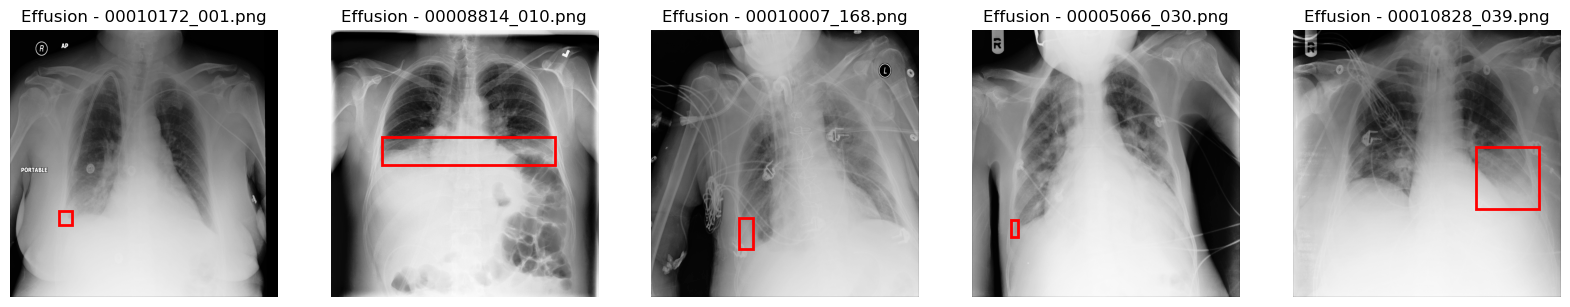

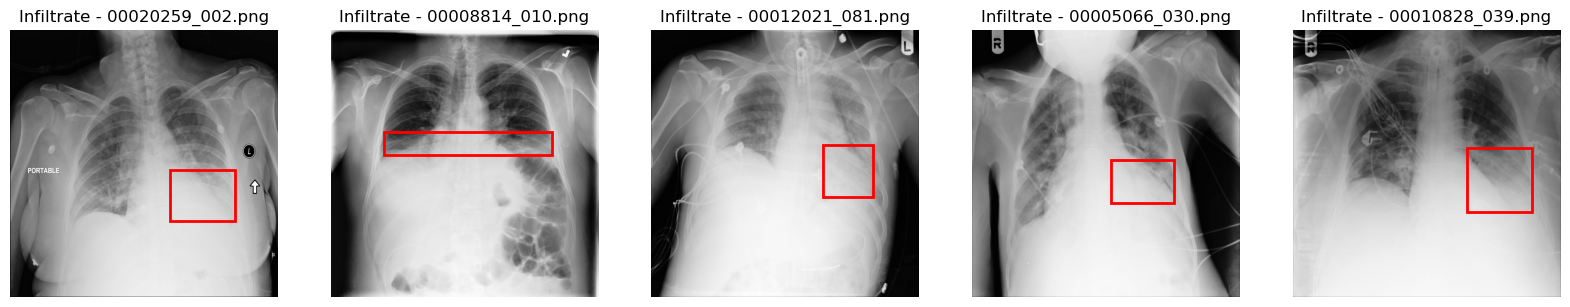

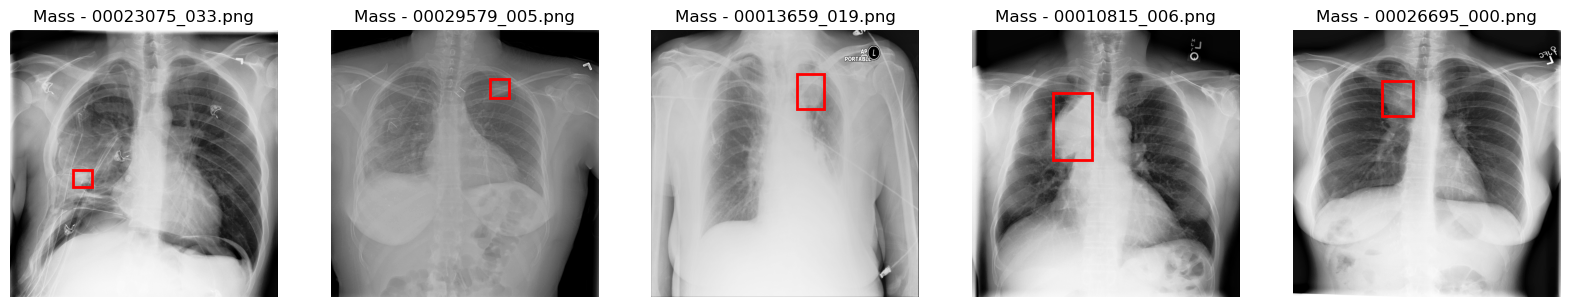

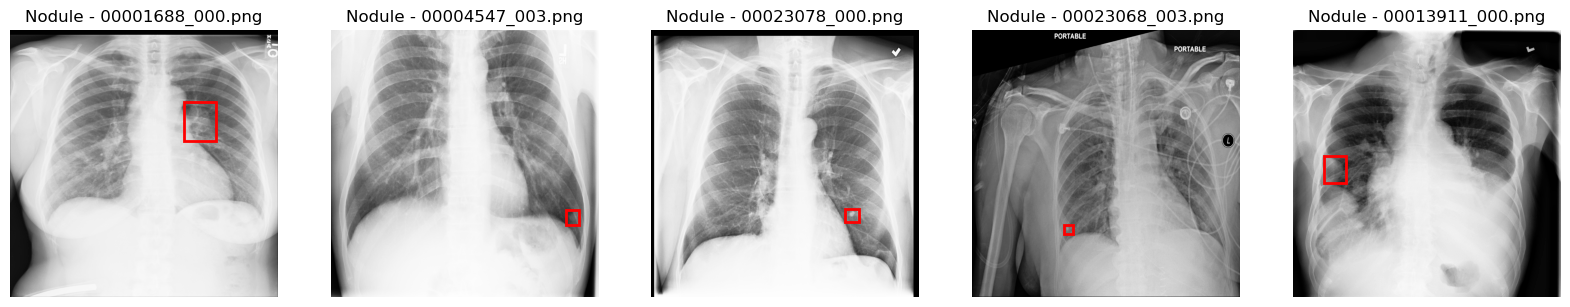

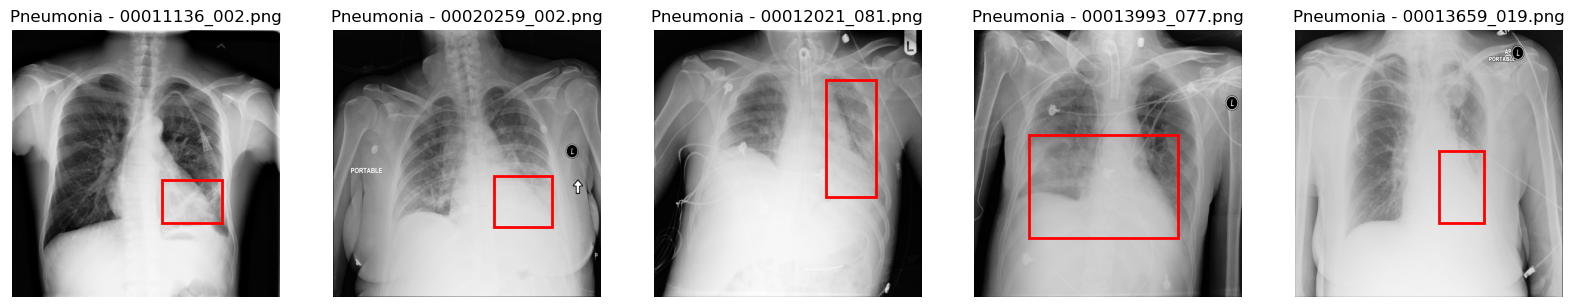

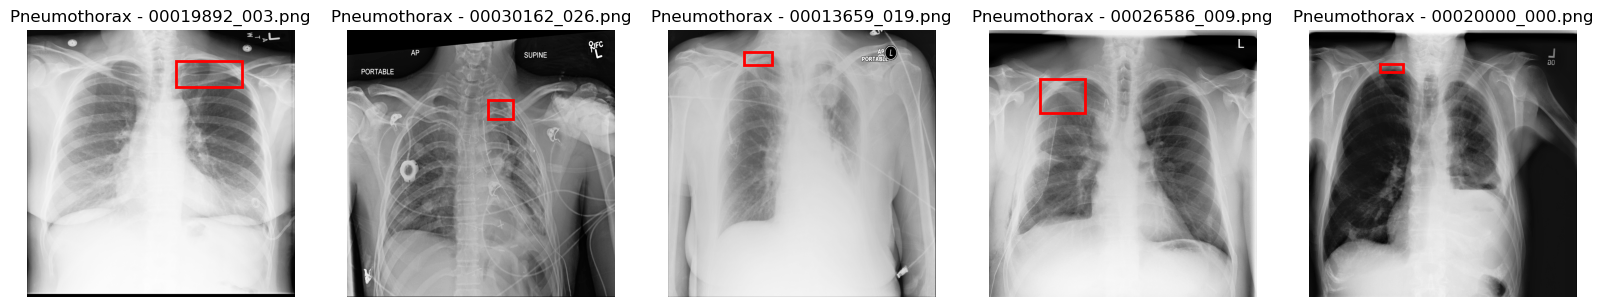

In [7]:
def plot_images_bb(label , save_name=None):
    
    import matplotlib.patches as patches
    
    df = bbox_list.loc[bbox_list['Finding Label'] == label]
    df = df.reset_index()
    df = df.loc[:4]
    fig = plt.figure(figsize=(20,10))

    i = 1
    for ii in df['Image Index']:
        dfs = df.loc[df['Image Index'] == ii]
        img = plt.imread(all_image_paths[ii])
        ax = fig.add_subplot(1,5,i)
        ax.imshow(img , cmap = 'Greys_r')
        rect = patches.Rectangle((dfs['Bbox [x'].values , dfs['y'].values) , dfs['w'].values , dfs['h]'].values , linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        ax.set_title(f'{label} - {ii}')
        plt.axis('off')
        i+=1
    if save_name != None:
        plt.savefig(f'bb_plot_5/{save_name}')
        
# Lets see where Bounding Boxes are marked on some of the original images.
for l in bbox_list['Finding Label'].unique():
    plot_images_bb(l , l+'.png')